In [1]:
import scipy 
from scipy.stats import entropy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def similarity(gen_img, data_check):
    
    kl = []
    for img in data_check:
        kl.append(entropy(img+0.000001, gen_img+0.000001)) #to avoid div by zero
        
    return kl
        
data = np.loadtxt('/home/NISE/DataSigns.csv', delimiter=',', dtype=np.float32, skiprows=1)
min_max = np.amax(data[:, 1:], axis=1) - np.amin(data[:, 1:], axis=1)
images_rows = data[:, 1:] - np.amin(data[:, 1:], axis=1).reshape(-1, 1)
images_rows = images_rows/min_max.reshape(-1, 1)
labels = data[:, 0]

data_check = []
for cl in range(25):
    if np.nonzero(data[:,0]==cl)[0].size:
        to_add = data[np.nonzero(data[:,0]==cl)[0][1], 1:]
        min_max = np.amax(to_add) - np.amin(to_add)
        im_row = to_add - np.amin(to_add)
        im_row = im_row/min_max
        data_check.append(im_row)
    
data_check = np.array(data_check)

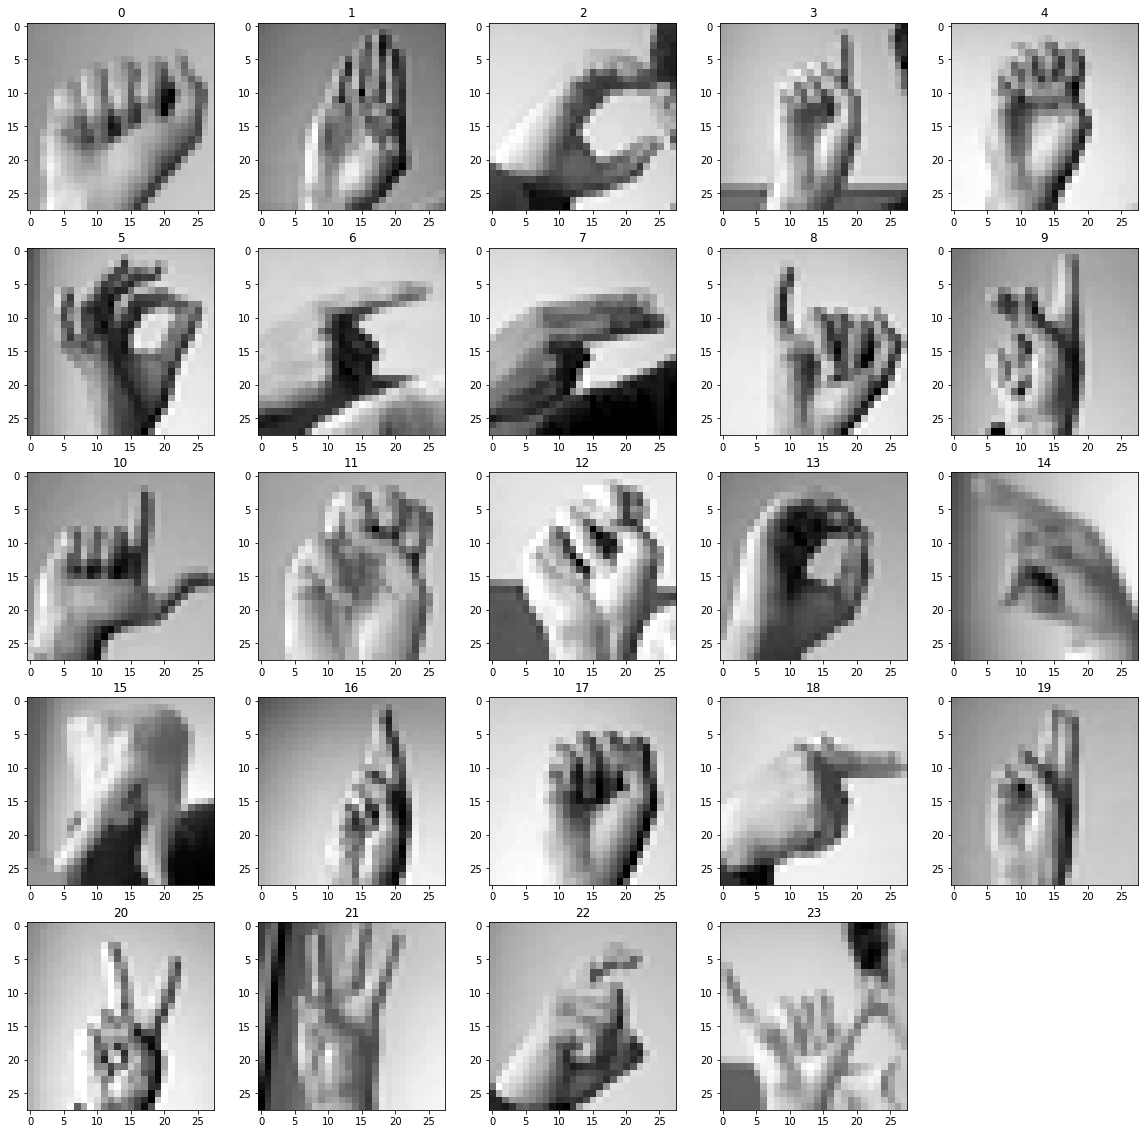

In [3]:
fig = plt.figure(figsize=(20,20))
i=1
for img in data_check:
    img_reshape = img.reshape((28,28))
    ax = fig.add_subplot(5,5,i)
    ax.imshow(img_reshape, cmap='gray')
    plt.title(str(i-1))
    i+=1

In [1]:
signsVoc = {0:'d', 1: 'c', 2: 'a', 3: 'b', 4: 'f',
            5:'e'}

In [ ]:
data_fake = []
for cl in range(25):
    if np.nonzero(data[:,0]==cl)[0].size:
        to_add = data[np.nonzero(data[:,0]==cl)[0][0], 1:]
        min_max = np.amax(to_add) - np.amin(to_add)
        im_row = to_add - np.amin(to_add)
        im_row = im_row/min_max
        data_fake.append(im_row)
    
data_fake = np.array(data_fake)

In [ ]:
sim_full = []
for image_sim in data_fake:
    to_add = np.array(np.exp(np.array(similarity(image_sim, data_check))))
    min_max = np.amax(to_add) - np.amin(to_add)
    to_add -= np.amin(to_add)
    to_add = to_add/min_max
    sim_full.append(to_add)

In [ ]:
from matplotlib import pyplot as plt
# fig = plt.figure(figsize=(24,24))
# ax = fig.add_subplot(111, frameon=True, xticks = [], yticks = [])
cells = np.array(sim_full)
img = plt.imshow(cells, cmap="Blues")
plt.colorbar()
img.set_visible(False)
plt.table(rowLabels = [letter for letter in signsVoc.values()], 
    colLabels = [letter for letter in signsVoc.values()], 
    loc = 'center',
    cellColours = img.to_rgba(cells))
plt.axis('off')
# ax.add_table(tb)
# plt.show()

In [ ]:
cells = np.array(sim_full)
img = plt.imshow(cells)
img.set_cmap('Blues')
plt.axis('off')